In [1]:
# (0) setting for mac

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [1]:
pwd

'/Users/elisachang/20190416_test'

In [2]:
# prepare dataset

In [6]:
# （1） 希望各類別圖片數量一致 打亂順序
#formal
import os
import random as r
import numpy as np

# def get_File(file_dir):

# The images in each subfolder
images = []
    
# The subfolders
subfolders = []
 
# Using "os.walk" function to grab all the files in each folder
for dirPath, dirNames, fileNames in os.walk('/Users/HelloMina001/train/'):
    
    names = []
    for name in fileNames:
        names.append(os.path.join(dirPath, name))

    for name in dirNames:
        subfolders.append(os.path.join(dirPath, name))
        
    # 隨機打亂各個資料夾內的數據
    r.shuffle(names)
    if names != []:
        images.append(names)
         
# 計算最小檔案數量的資料夾
mincount = float("Inf")
for num_folder in subfolders:
    n_img = len(os.listdir(num_folder))
        
    if n_img < mincount:
        mincount = n_img
    
    # 只保留最小檔案數量
for i in range(len(images)):
    images[i] = images[i][0:mincount]
    
images = np.reshape(images, [mincount*len(subfolders), ])      #cannot reshape array of size 4 into shape (2700,)  你需要把test_create_pic多出來的檔案刪掉
    
# To record the labels of the image dataset
labels = []
for count in range(len(subfolders)):
    labels = np.append(labels, mincount * [count])
    
# 打亂最後輸出的順序，去除每個類別間的隔閡
subfolders = np.array([images, labels])
subfolders = subfolders[:, np.random.permutation(subfolders.shape[1])].T
    
train_image_list = list(subfolders[:, 0])
train_label_list = list(subfolders[:, 1])
train_label_list = [int(float(i)) for i in train_label_list]
print( train_image_list, train_label_list)
# return image_list, label_list




['/Users/HelloMina001/train/test_002/square_002_76.jpg', '/Users/HelloMina001/train/test_001/circle_001_58.jpg', '/Users/HelloMina001/train/test_002/square_001_12.jpg', '/Users/HelloMina001/train/test_002/square_002_27.jpg', '/Users/HelloMina001/train/test_003/triangle_002_66.jpg', '/Users/HelloMina001/train/test_001/circle_003_64.jpg', '/Users/HelloMina001/train/test_002/square_002_71.jpg', '/Users/HelloMina001/train/test_002/square_001_63.jpg', '/Users/HelloMina001/train/test_003/triangle_001_60.jpg', '/Users/HelloMina001/train/test_003/triangle_001_32.jpg', '/Users/HelloMina001/train/test_002/square_002_55.jpg', '/Users/HelloMina001/train/test_001/circle_003_60.jpg', '/Users/HelloMina001/train/test_001/circle_002_96.jpg', '/Users/HelloMina001/train/test_001/circle_002_91.jpg', '/Users/HelloMina001/train/test_003/triangle_002_93.jpg', '/Users/HelloMina001/train/test_003/triangle_003_77.jpg', '/Users/HelloMina001/train/test_003/triangle_001_20.jpg', '/Users/HelloMina001/train/test_001

In [7]:
# （2 check order is correct )
# o:circle 1:square  2: triangle 
from PIL import *
from PIL import Image         

print(train_label_list[:10])        

position=1
x=train_image_list[position]
# label_list

img = Image.open(x)           
img.show()

print(train_label_list[position])

[1, 0, 1, 1, 2, 0, 1, 1, 2, 2]
0


In [8]:
# (3) create test data from train dataset 
# train 有900
# test 有180


test_label_list=train_label_list[:180]
test_image_list=train_image_list[:180]


print(len(test_label_list))
print(len(test_image_list))

180
180


In [9]:
# (4)
# 創建出final dataset
small_imgs = [Image.open(f).resize((43, 29)) for f in train_image_list]
train_image_1 = np.array([np.array(img) for img in small_imgs])

print(train_image_1.shape)      #(900, 29, 43, 3)


small_imgs = [Image.open(f).resize((43, 29)) for f in test_image_list]
test_image_1 = np.array([np.array(img) for img in small_imgs])

print(test_image_1.shape)        #(180, 29, 43, 3)

train_label_1=np.asarray(train_label_list)
train_label_2=train_label_1.reshape((len(train_label_1),1))
print(train_label_2[:3])


test_label_1=np.asarray(test_label_list)
test_label_2=test_label_1.reshape((len(test_label_1),1))
print(test_label_2[:3])

(900, 29, 43, 3)
(180, 29, 43, 3)
[[1]
 [0]
 [1]]
[[1]
 [0]
 [1]]


In [ ]:
# summary 
train_image_1
train_label_2
test_image_1
test_label_2

In [10]:
# (5)
import numpy as np
np.random.seed(10)
from keras.datasets import cifar10

(x_train_image, y_train_label), (x_test_image, y_test_label)=cifar10.load_data()

Using TensorFlow backend.


In [11]:
# (6) check formal datatype 
# print(x_train_image.shape)
# print(x_test_image.shape)  
# print(y_train_label.shape)
# print(y_test_label.shape)  

print(train_image_1.shape)
print(train_label_2.shape)
print(test_image_1.shape)
print(test_label_2.shape)

(900, 29, 43, 3)
(900, 1)
(180, 29, 43, 3)
(180, 1)


In [ ]:
# check 
# y_test_label

In [12]:
# (7)Img資料預處理

x_train_normalize=train_image_1.astype('float32')/255.0
x_test_normalize=test_image_1.astype('float32')/255.0  
print(x_train_normalize.shape)     #original:(50000, 32, 32, 3)
print(x_test_normalize.shape)      #original:(10000, 32, 32, 3)  

(900, 29, 43, 3)
(180, 29, 43, 3)


In [13]:
# (8)label資料預處理

from keras.utils import np_utils
y_train_onehot=np_utils.to_categorical(train_label_2)
y_test_onehot=np_utils.to_categorical(test_label_2)

In [14]:
# (9)
from keras.models import Sequential  
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D  
from keras.layers import ZeroPadding2D,Activation  

In [ ]:
# tip 
#Sequential?     # 如何看函數的功用 shift +tab *2

In [15]:
# (10)  建立cnn model
model=Sequential()
model.add(Conv2D(filters=32,                
                 kernel_size=(3,3),         
                 padding='same',            
                 input_shape=(29,43,3),     
                 activation='relu'))
model.add(Dropout(0.25))                    #為了避免overfitting 
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64,
                 kernel_size=(3,3),
                 padding='same',
                 activation='relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2, 2)))
#建立分類模型 MLP
model.add(Flatten())
# model.add(Dropout(0.25))
model.add(Dense(1024,activation='relu'))
# model.add(Dropout(0.25))
model.add(Dense(3,activation='softmax'))      # 最後輸出label 有幾個就要寫多少 此案子是3
model.summary()

Instructions for updating:
keep_dims is deprecated, use keepdims instead
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 29, 43, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 29, 43, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 21, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 21, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 14, 21, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 10, 64)         0         
_________________________________________________________________
fla

In [16]:
# (11)  計算loss
# 有的時候一模一樣的code 就是第二次執行才會成功
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

train_history=model.fit(x=x_train_normalize, y=y_train_onehot, validation_split=0.2, epochs=10, batch_size=20,verbose=2)

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Train on 720 samples, validate on 180 samples
Epoch 1/10
 - 14s - loss: 0.3361 - acc: 0.9222 - val_loss: 0.0046 - val_acc: 1.0000
Epoch 2/10
 - 11s - loss: 6.4782e-05 - acc: 1.0000 - val_loss: 6.1823e-04 - val_acc: 1.0000
Epoch 3/10
 - 11s - loss: 5.6664e-06 - acc: 1.0000 - val_loss: 4.3439e-04 - val_acc: 1.0000
Epoch 4/10
 - 14s - loss: 3.7681e-06 - acc: 1.0000 - val_loss: 3.7338e-04 - val_acc: 1.0000
Epoch 5/10
 - 12s - loss: 2.2989e-06 - acc: 1.0000 - val_loss: 2.7711e-04 - val_acc: 1.0000
Epoch 6/10
 - 13s - loss: 1.2974e-06 - acc: 1.0000 - val_loss: 2.0668e-04 - val_acc: 1.0000
Epoch 7/10
 - 14s - loss: 8.1766e-07 - acc: 1.0000 - val_loss: 1.6315e-04 - val_acc: 1.0000
Epoch 8/10
 - 14s - loss: 5.3230e-07 - acc: 1.0000 - val_loss: 1.3398e-04 - val_acc: 1.0000
Epoch 9/10
 - 15s - loss: 4.1119e-07 - acc: 1.0000 - val_loss: 1.1484e-04 - val_

In [ ]:
# tip 
# 這裡通常會卡住

In [17]:
# (12)
def show_train_history(train_history):
     fig=plt.gcf()
     fig.set_size_inches(16, 6)
     plt.subplot(121)
     plt.plot(train_history.history["acc"])
     plt.plot(train_history.history["val_acc"])
     plt.title("Train History")
     plt.xlabel("Epoch")
     plt.ylabel("Accuracy")
     plt.legend(["train", "validation"], loc="upper left")
     plt.subplot(122)
     plt.plot(train_history.history["loss"])
     plt.plot(train_history.history["val_loss"])
     plt.title("Train History")
     plt.xlabel("Epoch")
     plt.ylabel("Loss")
     plt.legend(["train", "validation"], loc="upper left")
     plt.show()

In [18]:
# (13)
import matplotlib.pyplot as plt
# show_train_history(train_history)

<Figure size 1600x600 with 2 Axes>

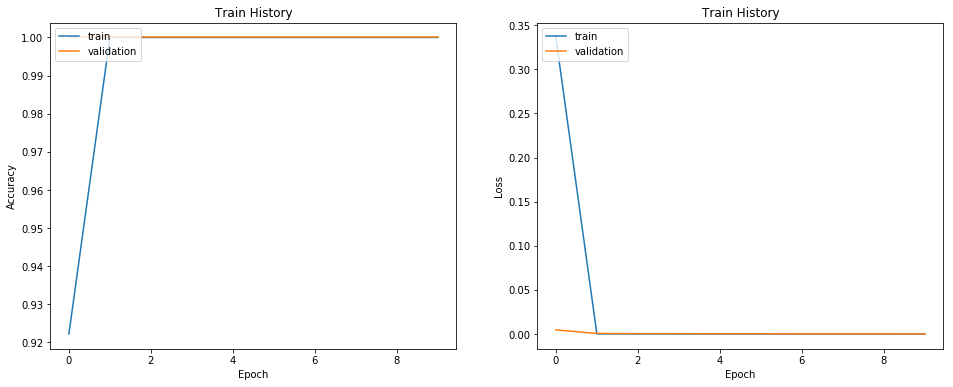

In [19]:
show_train_history(train_history)

In [20]:
scores=model.evaluate(x_test_normalize, y_test_onehot)

180/180 [==============================] - 0s 1ms/step


In [21]:
print("Accuracy=", scores)

Accuracy= [9.655507520720777e-05, 1.0]


In [22]:
prediction=model.predict_classes(x_test_normalize)  

In [25]:
print(prediction[:3])  
print(test_label_2[:3]) 

[1 0 1]
[[1]
 [0]
 [1]]
